# PHYS2201 Computational project 2

## Section 1: Display of a velocity field

we are given the following equation as the velocity of x direciton and y direction of flow field

\begin{eqnarray}
&&\vec{u}=\frac{-\alpha y}{(x-\beta)^2+y^2}-\frac{\alpha y}{(x+\beta)^2+y^2}\\
&&\vec{v}=\frac{\alpha (x-\beta)}{(x-\beta)^2+y^2}+\frac{\alpha (x+\beta)}{(x+\beta)^2+y^2}
\end{eqnarray}

where $\beta=0.4$ and $\alpha=1$. In order to solve for the trajectory, i.e. the function of postion, we need to solve:

\begin{equation} 
\frac{d\vec{x}}{dt} = \vec{u}
\end{equation}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

In [2]:
#from the in struction above, we firstly write a function defined with the velocity
def vectors(x,y,alpha,beta):
    u = - alpha*y/((x-beta)**2 + y**2)-alpha*y/((x+beta)**2+y**2)
    v = alpha*(x-beta)/((x-beta)**2 + y**2)+alpha*(x+beta)/((x+beta)**2+y**2)
    return u,v

Text(0, 0.5, 'y')

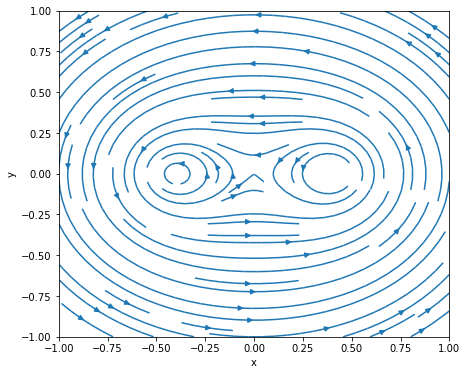

In [3]:
y = np.linspace(-1,1,200)
x = np.linspace(-1,1,200)
X,Y = np.meshgrid(x,y)

u,v = vectors(X,Y,1,0.4)

plt.figure(figsize=(7,6))
plt.streamplot(x,y,u,v,density=1)
plt.xlim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')

## Section 2: Construction of Intergral and Check

To achieve the highest accuracy with approximation to integral, we want to take the Runge-Kutta 4th other method.

In [4]:
#Defining an algorithm using the Runge-Kutta method
def RK4(t0,y0,dt,function):
    k1 = h*function(t0, y0)
    k2 = h*function(t0 + 0.5*h, y0 + 0.5*k1)
    k3 = h*function(t0 + 0.5*h, y0 + 0.5*k2)
    k4 = h*function(t0 + +h, y0 + k3)
        
    y = y0 + (1/6)*(k1+2*k2+2*k3+k4);
    t = t0 + h
    return y

In [5]:
#this function is defined as above in the first cell.
#The purpose of the function is to test whether the RK4 function is well functional
def func_output(t,vec):
    X,Y=vec
    dx=- alpha*Y/((X-beta)**2 + Y**2)-alpha*Y/((X+beta)**2+Y**2)
    dy= alpha*(X-beta)/((X-beta)**2 + Y**2)+alpha*(X+beta)/((X+beta)**2+Y**2)
    return np.array([dx,dy])

In [6]:
# this cell is to generate the trajectory within an array
t0 = 0
#we can't choose this initial position on y0= [0,0], otherwise the we can't see anything significant because of the definition of this field
y0 = np.array([[0.5,0.5]])
h = 0.01
pos= y0
alpha=1
beta=0.4
for ii in range(80):
    pos_n=RK4(t0, pos[-1], h,func_output)
    pos=np.vstack((pos,pos_n))
'''The selection of dt=h=0.01 is given by the scale of the X and Y defined earlier
There is a difference of 0.01 for each neighbour X or Y. 
Hence the defining h=0.01 is capable to show an accurate approximation
If we take the time step too large, such as h=0.1, each two neighbour positions of [X,Y] will be far from each other;
any point in between will not be well presented, so the approximation are very likely to be inaccurate'''

'The selection of dt=h=0.01 is given by the scale of the X and Y defined earlier\nThere is a difference of 0.01 for each neighbour X or Y. \nHence the defining h=0.01 is capable to show an accurate approximation\nIf we take the time step too large, such as h=0.1, each two neighbour positions of [X,Y] will be far from each other;\nany point in between will not be well presented, so the approximation are very likely to be inaccurate'

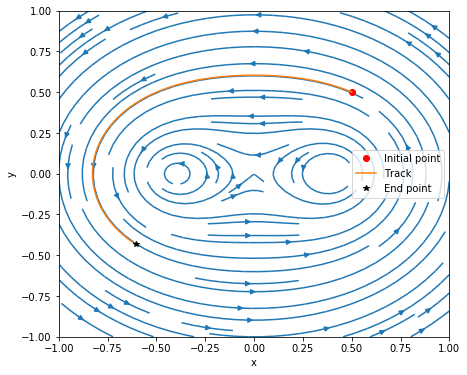

In [7]:
plt.figure(figsize=(7,6))
plt.streamplot(X,Y,u,v,density=1)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.plot(pos[0,0],pos[0,1],'or',label='Initial point')
plt.plot(pos[:,0],pos[:,1],'-',label='Track')
plt.plot(pos[-1,0],pos[-1,1],'*k',label='End point')
plt.legend()

As shown above, the function RK4 can approximate the intergral well. The yellow line in the plot is almost the same as the field line, so we can say the trajectory is correct.

## Section 3: Blinking vortex

Consider a chaotic system with coefficient $\beta$ varies with time.

\begin{eqnarray}
    &&u(x,y,t) = \frac{- \alpha y}{(x-\beta)^2 + y^2}  \\
    &&v(x,y,t) = \frac{\alpha(x-\beta)}{(x-\beta)^2 + y^2} \\
    &&\beta(t) =\beta_0 sign(\sin(2 \pi t))
\end{eqnarray}


In [8]:
#similar to func_output, define a blinking vortex functionas below
def bvortex(t,vec):
    X,Y=vec
    beta = 0.4*np.sign(np.sin(2*np.pi*t))
    dx = -((alpha*Y)/((X-beta)**2+Y**2))
    dy = ((alpha*(X-beta))/((X-beta)**2+Y**2))
    return np.array([dx,dy])

In [9]:
t0=0
y0 = np.array([[0.4,0.5]])
h = 0.01
loc= y0
alpha=1
for ii in range(100):
    loc_n=RK4(t0, loc[-1], h,bvortex)
    loc=np.vstack((loc,loc_n))

In [10]:
def vortexvect(x,y,alpha,t):
    beta = 0.4*np.sign(np.sin(2*np.pi*t))
    u2 = -((alpha*Y)/((X-beta)**2+Y**2))
    v2 = ((alpha*(X-beta))/((X-beta)**2+Y**2))
    return u2,v2

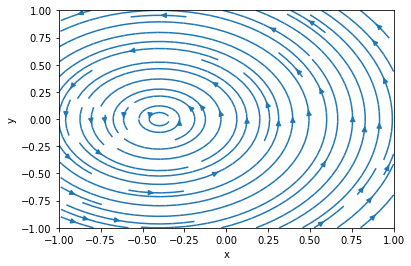

In [11]:
y = np.linspace(-1,1,200)
x = np.linspace(-1,1,200)
t = 1
X,Y = np.meshgrid(x,y)

u2,v2 = vortexvect(X,Y,1,t)
figure, ax = plt.subplots()
stream = ax.streamplot(X,Y,u2,v2,density=1)
ax.set_xlabel('x')
ax.set_ylabel('y')

def animate(iter):
    ax.collections = [] # clear lines streamplot
    ax.patches = [] # clear arrowheads streamplot
    

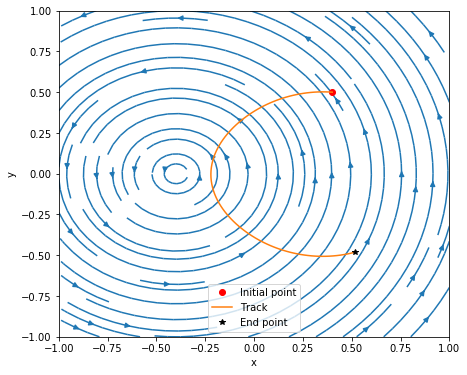

In [12]:
plt.figure(figsize=(7,6))
plt.streamplot(X,Y,u2,v2,density=1)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.plot(loc[0,0],loc[0,1],'or',label='Initial point')
plt.plot(loc[:,0],loc[:,1],'-',label='Track')
plt.plot(loc[-1,0],loc[-1,1],'*k',label='End point')
plt.legend()

0.0
0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
0.0


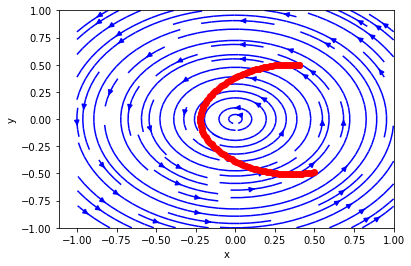

In [15]:
plt.rcParams['animation.ffmpeg_path'] = r'C:\Research_modules\ffmpeg-20191016-29dac29-win64-static\bin\ffmpeg.exe' 
#make sure you download FFmpeg files for windows 10 from https://ffmpeg.zeranoe.com/builds/ and specify where the 
#the file is in above command.
y = np.linspace(-1,1,200)
x = np.linspace(-1,1,200)
t = 1
X,Y = np.meshgrid(x,y)


#color = dyu
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')

def animate(iter):
    ax.collections = [] # clear lines streamplot
    ax.patches = [] # clear arrowheads streamplot
    t = iter*0.01
    u2,v2 = vortexvect(X,Y,1,t)
    ax.streamplot(X,Y,u2,v2,density=1, color='b')
    ax.plot(loc[iter,0],loc[iter,1],'or')
    print(t)
    return ax

anim =   ani.FuncAnimation(fig, animate, frames=100, interval=10, blit=False, repeat=False)

FFwriter=ani.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
anim.save(r'stream.mp4', writer=FFwriter)


Below are other examples.

C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


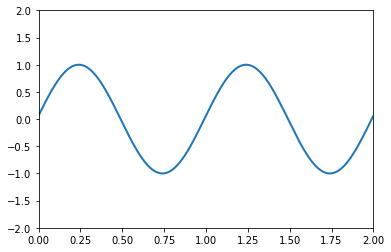

In [27]:
plt.rcParams['animation.ffmpeg_path'] = r'C:\Research_modules\ffmpeg-20191016-29dac29-win64-static\bin\ffmpeg.exe' #make sure you download FFmpeg files for windows 10 from https://ffmpeg.zeranoe.com/builds/

fig = plt.figure()

ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))

im, = ax.plot([], [], lw=2)

def init():
    im.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    im.set_data(x, y)
    return im,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)

FFwriter=animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
anim.save(r'basic_animation.mp4', writer=FFwriter)

plt.show()

C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:166: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


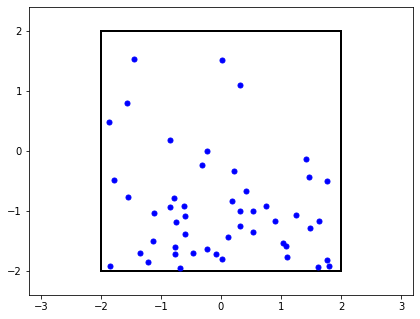

In [45]:
"""
Animation of Elastic collisions with Gravity

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""
import numpy as np
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
plt.rcParams['animation.ffmpeg_path'] = r'C:\Research_modules\ffmpeg-20191016-29dac29-win64-static\bin\ffmpeg.exe' #make sure you download FFmpeg files for windows 10 from https://ffmpeg.zeranoe.com/builds/

class ParticleBox:
    """Orbits class
    
    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state = [[1, 0, 0, -1],
                               [-0.5, 0.5, 0.5, 0.5],
                               [-0.5, -0.5, -0.5, 0.5]],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 9.8):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M * np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt
        
        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        # find pairs of particles undergoing a collision
        D = squareform(pdist(self.state[:, :2]))
        ind1, ind2 = np.where(D < 2 * self.size)
        unique = (ind1 < ind2)
        ind1 = ind1[unique]
        ind2 = ind2[unique]

        # update velocities of colliding pairs
        for i1, i2 in zip(ind1, ind2):
            # mass
            m1 = self.M[i1]
            m2 = self.M[i2]

            # location vector
            r1 = self.state[i1, :2]
            r2 = self.state[i2, :2]

            # velocity vector
            v1 = self.state[i1, 2:]
            v2 = self.state[i2, 2:]

            # relative location & velocity vectors
            r_rel = r1 - r2
            v_rel = v1 - v2

            # momentum vector of the center of mass
            v_cm = (m1 * v1 + m2 * v2) / (m1 + m2)

            # collisions of spheres reflect v_rel over r_rel
            rr_rel = np.dot(r_rel, r_rel)
            vr_rel = np.dot(v_rel, r_rel)
            v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

            # assign new velocities
            self.state[i1, 2:] = v_cm + v_rel * m2 / (m1 + m2)
            self.state[i2, 2:] = v_cm - v_rel * m1 / (m1 + m2) 

        # check for crossing boundary
        crossed_x1 = (self.state[:, 0] < self.bounds[0] + self.size)
        crossed_x2 = (self.state[:, 0] > self.bounds[1] - self.size)
        crossed_y1 = (self.state[:, 1] < self.bounds[2] + self.size)
        crossed_y2 = (self.state[:, 1] > self.bounds[3] - self.size)

        self.state[crossed_x1, 0] = self.bounds[0] + self.size
        self.state[crossed_x2, 0] = self.bounds[1] - self.size

        self.state[crossed_y1, 1] = self.bounds[2] + self.size
        self.state[crossed_y2, 1] = self.bounds[3] - self.size

        self.state[crossed_x1 | crossed_x2, 2] *= -1
        self.state[crossed_y1 | crossed_y2, 3] *= -1

        # add gravity
        self.state[:, 3] -= self.M * self.G * dt


#------------------------------------------------------------
# set up initial state
np.random.seed(0)
init_state = -0.5 + np.random.random((50, 4))
init_state[:, :2] *= 3.9

box = ParticleBox(init_state, size=0.04)
dt = 1. / 30 # 30fps


#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles, = ax.plot([], [], 'bo', ms=6)

# rect is the box edge
rect = plt.Rectangle(box.bounds[::2],
                     box.bounds[1] - box.bounds[0],
                     box.bounds[3] - box.bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

def init():
    """initialize animation"""
    global box, rect
    particles.set_data([], [])
    rect.set_edgecolor('none')
    return particles, rect

def animate(i):
    """perform animation step"""
    global box, rect, dt, ax, fig
    box.step(dt)

    ms = int(fig.dpi * 2 * box.size * fig.get_figwidth()
             / np.diff(ax.get_xbound())[0])
    
    # update pieces of the animation
    rect.set_edgecolor('k')
    particles.set_data(box.state[:, 0], box.state[:, 1])
    particles.set_markersize(ms)
    return particles, rect

ani = animation.FuncAnimation(fig, animate, frames=600,
                              interval=10, blit=True, init_func=init)


# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
ani.save('particle_box.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0


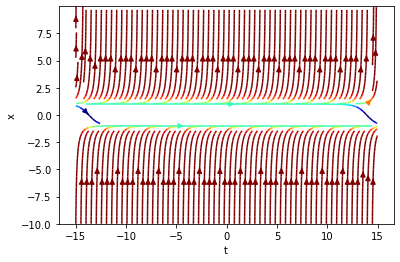

In [46]:
plt.rcParams['animation.ffmpeg_path'] = r'C:\Research_modules\ffmpeg-20191016-29dac29-win64-static\bin\ffmpeg.exe' #make sure you download FFmpeg files for windows 10 from https://ffmpeg.zeranoe.com/builds/

nx, ny = .02, .02
x = np.arange(-15, 15, nx)
y = np.arange(-10, 10, ny)
X, Y = np.meshgrid(x, y)
dy = -1 + Y**2
dx = np.ones(dy.shape)

dyu = dy / np.sqrt(dy**2 + dx**2)
dxu = dx / np.sqrt(dy**2 + dx**2)

color = dyu
fig, ax = plt.subplots()
stream = ax.streamplot(X,Y,dxu, dyu, color=color, density=2, cmap='jet',arrowsize=1)
ax.set_xlabel('t')
ax.set_ylabel('x')

def animate(iter):
    ax.collections = [] # clear lines streamplot
    ax.patches = [] # clear arrowheads streamplot
    dy = -1 + iter * 0.01 + Y**2
    dx = np.ones(dy.shape)
    dyu = dy / np.sqrt(dy**2 + dx**2)
    dxu = dx / np.sqrt(dy**2 + dx**2)
    stream = ax.streamplot(X,Y,dxu, dyu, color=color, density=2, cmap='jet',arrowsize=1)
    print(iter)
    return stream

anim =   ani.FuncAnimation(fig, animate, frames=100, interval=50, blit=False, repeat=False)
anim.save('animation.gif', writer='imagemagick', fps=60)
# plt.show()